**Домашнее задание**

1.Для реализованной модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.

2*. Модифицировать реализованный алгоритм, чтобы получился стохастический градиентный бустинг. Размер подвыборки принять равным 0.5. Сравнить на одном графике кривые изменения ошибки на тестовой выборке в зависимости от числа итераций. (от количества деревьев?)

In [1]:
from sklearn.tree import DecisionTreeRegressor

from sklearn import model_selection
import numpy as np

from sklearn.datasets import load_diabetes

In [20]:
import matplotlib.pyplot as plt

In [2]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [3]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

def bias(y, z):
    return (y - z)

In [4]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        # базовый алгоритм
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

Задание 1. Обучим несколько моделей с разными параметрами и исследуем их поведение.

In [15]:
# Построим цикл
# ключ будет глубина, значения - список ошибок, исходя из количества деревьев
train_error_dict_01 = {}
test_error_dict_01 = {}

# Шаг
eta = 0.1

# Число деревьев в ансамбле
list_n_trees = [1, 5, 10, 15, 20, 25, 30, 50, 70, 100]

# глубина по циклу
for max_depth in range(2, 7):
    train_error = []
    test_error = []
    for n_trees in list_n_trees:
        coefs = [1] * n_trees
        trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
        train_prediction = gb_predict(X_train, trees, coefs, eta)
        train_error.append(mean_squared_error(y_train, train_prediction))
        test_prediction = gb_predict(X_test, trees, coefs, eta)
        test_error.append(mean_squared_error(y_test, test_prediction))
    train_error_dict_01[max_depth] = train_error
    test_error_dict_01[max_depth] = test_error

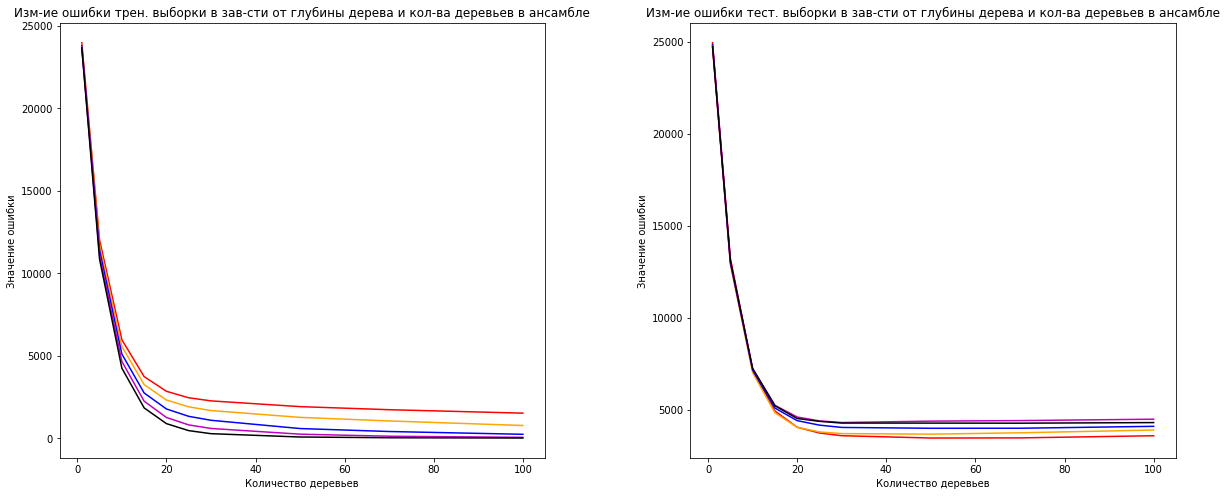

In [59]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(20, 8)
fig.subplots_adjust(wspace=0.3, hspace=0.3)
ax1, ax2 = ax.flatten()

ax1.set_title('Изм-ие ошибки трен. выборки в зав-сти от глубины дерева и кол-ва деревьев в ансамбле')
ax1.set_xlabel('Количество деревьев')
ax1.set_ylabel('Значение ошибки')
ax1.plot(list_n_trees, train_error_dict_01[2], color='r',  label='Шаг = 0,1, глубина = 2')
ax1.plot(list_n_trees, train_error_dict_01[3], color='orange',  label='Шаг = 0,1, глубина = 3')
ax1.plot(list_n_trees, train_error_dict_01[4], color='b', label='Шаг = 0,1, глубина = 4')
ax1.plot(list_n_trees, train_error_dict_01[5], color='m', label='Шаг = 0,1, глубина = 5')
ax1.plot(list_n_trees, train_error_dict_01[6],  color='k',label='Шаг = 0,1, глубина = 6')

ax2.set_title('Изм-ие ошибки тест. выборки в зав-сти от глубины дерева и кол-ва деревьев в ансамбле')
ax2.set_xlabel('Количество деревьев')
ax2.set_ylabel('Значение ошибки')
ax2.plot(list_n_trees, test_error_dict_01[2], color='r',  label='Шаг = 0,1, глубина = 2')
ax2.plot(list_n_trees, test_error_dict_01[3], color='orange',  label='Шаг = 0,1, глубина = 3')
ax2.plot(list_n_trees, test_error_dict_01[4], color='b', label='Шаг = 0,1, глубина = 4')
ax2.plot(list_n_trees, test_error_dict_01[5], color='m', label='Шаг = 0,1, глубина = 5')
ax2.plot(list_n_trees, test_error_dict_01[6],  color='k',label='Шаг = 0,1, глубина = 6')

In [43]:
# Построим цикл
# ключ будет глубина, значения - список ошибок, исходя из количества деревьев
train_error_dict_03 = {}
test_error_dict_03 = {}

# Шаг
eta = 0.3

# Число деревьев в ансамбле
list_n_trees = [1, 5, 10, 15, 20, 25, 30, 50, 70, 100]

# глубина по циклу
for max_depth in range(2, 7):
    train_error = []
    test_error = []
    for n_trees in list_n_trees:
        coefs = [1] * n_trees
        trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
        train_prediction = gb_predict(X_train, trees, coefs, eta)
        train_error.append(mean_squared_error(y_train, train_prediction))
        test_prediction = gb_predict(X_test, trees, coefs, eta)
        test_error.append(mean_squared_error(y_test, test_prediction))
    train_error_dict_03[max_depth] = train_error
    test_error_dict_03[max_depth] = test_error

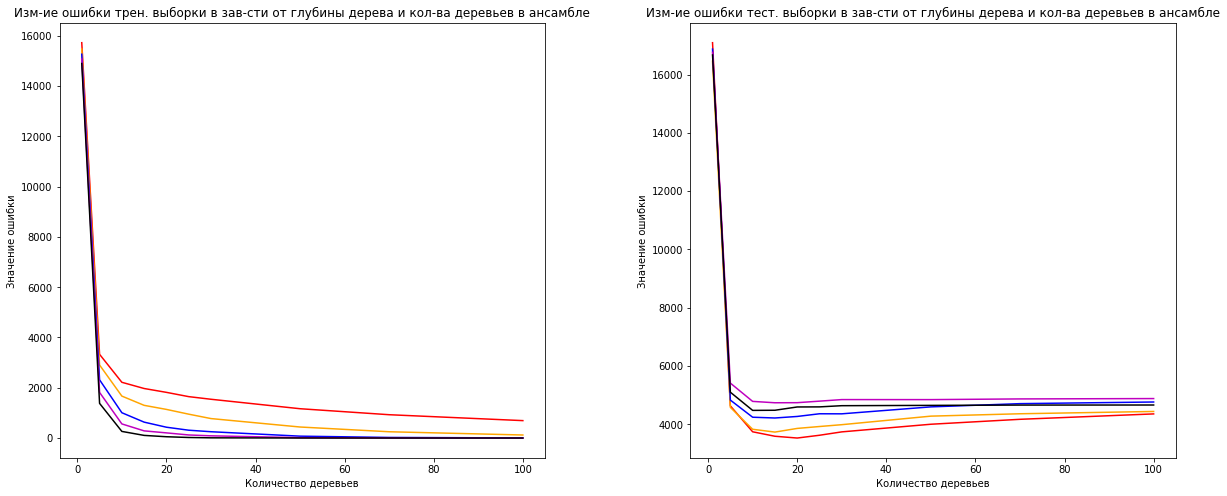

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(20, 8)
fig.subplots_adjust(wspace=0.3, hspace=0.3)
ax1, ax2 = ax.flatten()

ax1.set_title('Изм-ие ошибки трен. выборки в зав-сти от глубины дерева и кол-ва деревьев в ансамбле')
ax1.set_xlabel('Количество деревьев')
ax1.set_ylabel('Значение ошибки')
ax1.plot(list_n_trees, train_error_dict_03[2], color='r',  label='Шаг = 0,3, глубина = 2')
ax1.plot(list_n_trees, train_error_dict_03[3], color='orange',  label='Шаг = 0,3, глубина = 3')
ax1.plot(list_n_trees, train_error_dict_03[4], color='b', label='Шаг = 0,3, глубина = 4')
ax1.plot(list_n_trees, train_error_dict_03[5], color='m', label='Шаг = 0,3, глубина = 5')
ax1.plot(list_n_trees, train_error_dict_03[6],  color='k',label='Шаг = 0,3, глубина = 6')

ax2.set_title('Изм-ие ошибки тест. выборки в зав-сти от глубины дерева и кол-ва деревьев в ансамбле')
ax2.set_xlabel('Количество деревьев')
ax2.set_ylabel('Значение ошибки')
ax2.plot(list_n_trees, test_error_dict_03[2], color='r',  label='Шаг = 0,3, глубина = 2')
ax2.plot(list_n_trees, test_error_dict_03[3], color='orange',  label='Шаг = 0,3, глубина = 3')
ax2.plot(list_n_trees, test_error_dict_03[4], color='b', label='Шаг = 0,3, глубина = 4')
ax2.plot(list_n_trees, test_error_dict_03[5], color='m', label='Шаг = 0,3, глубина = 5')
ax2.plot(list_n_trees, test_error_dict_03[6],  color='k',label='Шаг = 0,3, глубина = 6')

In [16]:
# Построим цикл
# ключ будет глубина, значения - список ошибок, исходя из количества деревьев
train_error_dict_05 = {}
test_error_dict_05 = {}

# Шаг
eta = 0.5

# Число деревьев в ансамбле
list_n_trees = [1, 5, 10, 15, 20, 25, 30, 50, 70, 100]

# глубина по циклу
for max_depth in range(2, 7):
    train_error = []
    test_error = []
    for n_trees in list_n_trees:
        coefs = [1] * n_trees
        trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
        train_prediction = gb_predict(X_train, trees, coefs, eta)
        train_error.append(mean_squared_error(y_train, train_prediction))
        test_prediction = gb_predict(X_test, trees, coefs, eta)
        test_error.append(mean_squared_error(y_test, test_prediction))
    train_error_dict_05[max_depth] = train_error
    test_error_dict_05[max_depth] = test_error

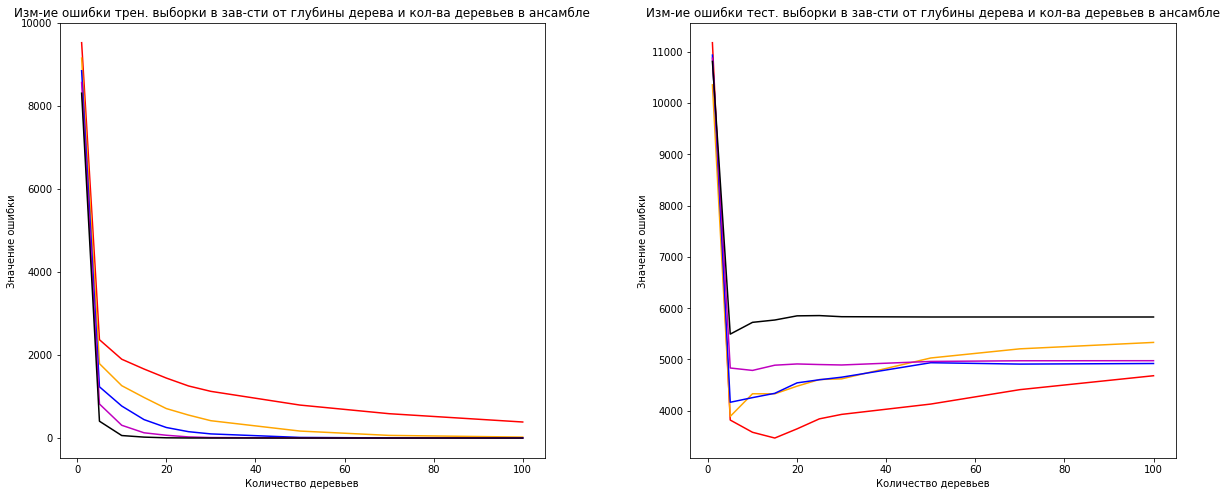

In [40]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(20, 8)
fig.subplots_adjust(wspace=0.3, hspace=0.3)
ax1, ax2 = ax.flatten()

ax1.set_title('Изм-ие ошибки трен. выборки в зав-сти от глубины дерева и кол-ва деревьев в ансамбле')
ax1.set_xlabel('Количество деревьев')
ax1.set_ylabel('Значение ошибки')
ax1.plot(list_n_trees, train_error_dict_05[2], color='r',  label='Шаг = 0,5, глубина = 2')
ax1.plot(list_n_trees, train_error_dict_05[3], color='orange',  label='Шаг = 0,5, глубина = 3')
ax1.plot(list_n_trees, train_error_dict_05[4], color='b', label='Шаг = 0,5, глубина = 4')
ax1.plot(list_n_trees, train_error_dict_05[5], color='m', label='Шаг = 0,5, глубина = 5')
ax1.plot(list_n_trees, train_error_dict_05[6],  color='k',label='Шаг = 0,5, глубина = 6')

ax2.set_title('Изм-ие ошибки тест. выборки в зав-сти от глубины дерева и кол-ва деревьев в ансамбле')
ax2.set_xlabel('Количество деревьев')
ax2.set_ylabel('Значение ошибки')
ax2.plot(list_n_trees, test_error_dict_05[2], color='r',  label='Шаг = 0,5, глубина = 2')
ax2.plot(list_n_trees, test_error_dict_05[3], color='orange',  label='Шаг = 0,5, глубина = 3')
ax2.plot(list_n_trees, test_error_dict_05[4], color='b', label='Шаг = 0,5, глубина = 4')
ax2.plot(list_n_trees, test_error_dict_05[5], color='m', label='Шаг = 0,5, глубина = 5')
ax2.plot(list_n_trees, test_error_dict_05[6],  color='k',label='Шаг = 0,5, глубина = 6')

In [17]:
# Построим цикл
# ключ будет глубина, значения - список ошибок, исходя из количества деревьев
train_error_dict_07 = {}
test_error_dict_07 = {}

# Шаг
eta = 0.7

# Число деревьев в ансамбле
list_n_trees = [1, 5, 10, 15, 20, 25, 30, 50, 70, 100]

# глубина по циклу
for max_depth in range(2, 7):
    train_error = []
    test_error = []
    for n_trees in list_n_trees:
        coefs = [1] * n_trees
        trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
        train_prediction = gb_predict(X_train, trees, coefs, eta)
        train_error.append(mean_squared_error(y_train, train_prediction))
        test_prediction = gb_predict(X_test, trees, coefs, eta)
        test_error.append(mean_squared_error(y_test, test_prediction))
    train_error_dict_07[max_depth] = train_error
    test_error_dict_07[max_depth] = test_error

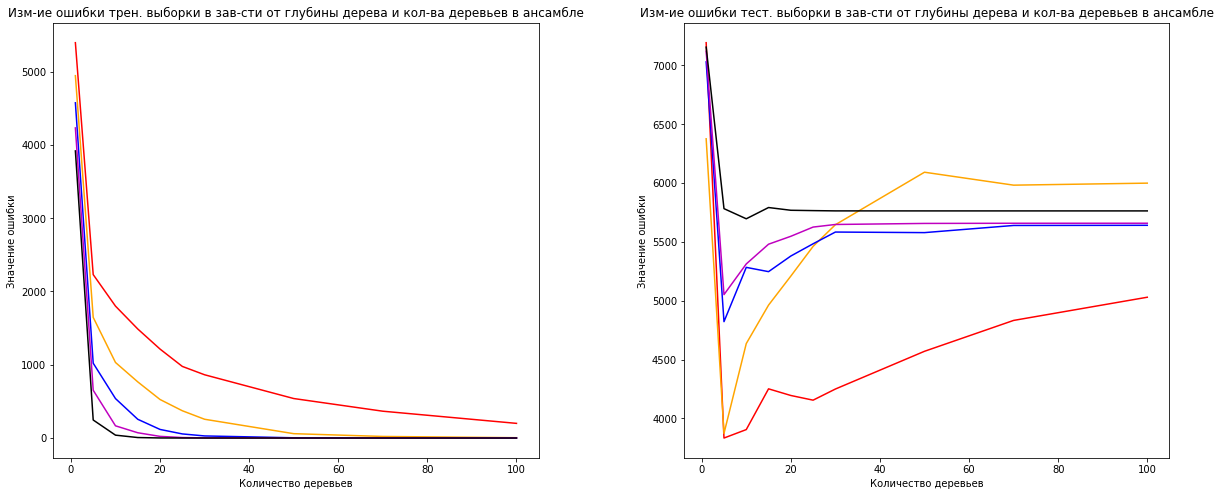

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(20, 8)
fig.subplots_adjust(wspace=0.3, hspace=0.3)
ax1, ax2 = ax.flatten()

ax1.set_title('Изм-ие ошибки трен. выборки в зав-сти от глубины дерева и кол-ва деревьев в ансамбле')
ax1.set_xlabel('Количество деревьев')
ax1.set_ylabel('Значение ошибки')
ax1.plot(list_n_trees, train_error_dict_07[2], color='r',  label='Шаг = 0,7, глубина = 2')
ax1.plot(list_n_trees, train_error_dict_07[3], color='orange',  label='Шаг = 0,7, глубина = 3')
ax1.plot(list_n_trees, train_error_dict_07[4], color='b', label='Шаг = 0,7, глубина = 4')
ax1.plot(list_n_trees, train_error_dict_07[5], color='m', label='Шаг = 0,7, глубина = 5')
ax1.plot(list_n_trees, train_error_dict_07[6],  color='k',label='Шаг = 0,7, глубина = 6')

ax2.set_title('Изм-ие ошибки тест. выборки в зав-сти от глубины дерева и кол-ва деревьев в ансамбле')
ax2.set_xlabel('Количество деревьев')
ax2.set_ylabel('Значение ошибки')
ax2.plot(list_n_trees, test_error_dict_07[2], color='r',  label='Шаг = 0,7, глубина = 2')
ax2.plot(list_n_trees, test_error_dict_07[3], color='orange',  label='Шаг = 0,7, глубина = 3')
ax2.plot(list_n_trees, test_error_dict_07[4], color='b', label='Шаг = 0,7, глубина = 4')
ax2.plot(list_n_trees, test_error_dict_07[5], color='m', label='Шаг = 0,7, глубина = 5')
ax2.plot(list_n_trees, test_error_dict_07[6],  color='k',label='Шаг = 0,7, глубина = 6')

In [18]:
# Построим цикл
# ключ будет глубина, значения - список ошибок, исходя из количества деревьев
train_error_dict_1 = {}
test_error_dict_1 = {}

# Шаг
eta = 1

# Число деревьев в ансамбле
list_n_trees = [1, 5, 10, 15, 20, 25, 30, 50, 70, 100]

# глубина по циклу
for max_depth in range(2, 7):
    train_error = []
    test_error = []
    for n_trees in list_n_trees:
        coefs = [1] * n_trees
        trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
        train_prediction = gb_predict(X_train, trees, coefs, eta)
        train_error.append(mean_squared_error(y_train, train_prediction))
        test_prediction = gb_predict(X_test, trees, coefs, eta)
        test_error.append(mean_squared_error(y_test, test_prediction))
    train_error_dict_1[max_depth] = train_error
    test_error_dict_1[max_depth] = test_error

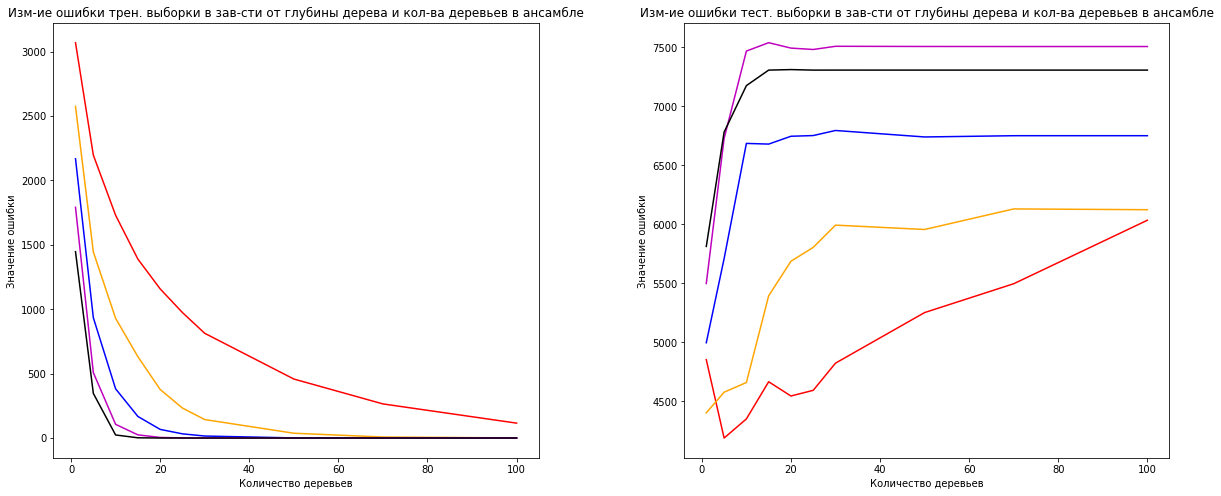

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(20, 8)
fig.subplots_adjust(wspace=0.3, hspace=0.3)
ax1, ax2 = ax.flatten()

ax1.set_title('Изм-ие ошибки трен. выборки в зав-сти от глубины дерева и кол-ва деревьев в ансамбле')
ax1.set_xlabel('Количество деревьев')
ax1.set_ylabel('Значение ошибки')
ax1.plot(list_n_trees, train_error_dict_1[2], color='r',  label='Шаг = 1, глубина = 2')
ax1.plot(list_n_trees, train_error_dict_1[3], color='orange',  label='Шаг = 1, глубина = 3')
ax1.plot(list_n_trees, train_error_dict_1[4], color='b', label='Шаг = 1, глубина = 4')
ax1.plot(list_n_trees, train_error_dict_1[5], color='m', label='Шаг = 1, глубина = 5')
ax1.plot(list_n_trees, train_error_dict_1[6],  color='k',label='Шаг = 1, глубина = 6')

ax2.set_title('Изм-ие ошибки тест. выборки в зав-сти от глубины дерева и кол-ва деревьев в ансамбле')
ax2.set_xlabel('Количество деревьев')
ax2.set_ylabel('Значение ошибки')
ax2.plot(list_n_trees, test_error_dict_1[2], color='r',  label='Шаг = 1, глубина = 2')
ax2.plot(list_n_trees, test_error_dict_1[3], color='orange',  label='Шаг = 1, глубина = 3')
ax2.plot(list_n_trees, test_error_dict_1[4], color='b', label='Шаг = 1, глубина = 4')
ax2.plot(list_n_trees, test_error_dict_1[5], color='m', label='Шаг = 1, глубина = 5')
ax2.plot(list_n_trees, test_error_dict_1[6],  color='k',label='Шаг = 1, глубина = 6')

Вывод. Есть склонность к переобучению при определенном количестве деревьев и глубине. Эти пороговые значения также зависят от шага.

Задание 2.

In [46]:
def gb_fit_stochastic(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        # базовый алгоритм
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
        
        # Определяем случайные индексы для подвыборки
        list_of_random_indexes = []
        
        while len(list_of_random_indexes) < X_train.shape[0]/2:
            random_index = np.random.randint(0, X_train.shape[0])
            if random_index not in list_of_random_indexes:
                list_of_random_indexes.append(random_index)
            

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
    
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train[list_of_random_indexes], y_train[list_of_random_indexes])  # не всю выборку
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train[list_of_random_indexes], bias(y_train[list_of_random_indexes], target[list_of_random_indexes])) # не всю выборку
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [47]:
# Число деревьев в ансамбле
n_trees = 50

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 3

# Шаг
eta = 0.1

trees_stoch, train_errors_stoch, test_errors_stock = gb_fit_stochastic(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [54]:
def get_error_plot_compair_train(n_trees, train_err, train_err_stoch):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), train_err_stoch, label='train error stochactic')
    plt.legend(loc='upper right')
    plt.show()

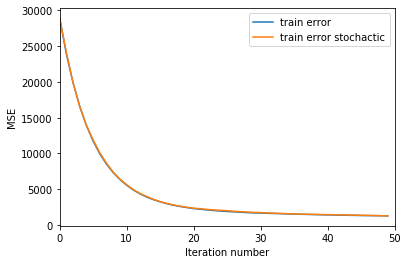

In [55]:
get_error_plot_compair_train(n_trees, train_errors, train_errors_stoch)

Линии почти идентичны. Модель не теряет качества на тренировочных данных при стохастическом варианте.